## Name: Syed Mustafa

## Task -2  COLOR IDENTIFICATION

### #GRIPAUG21 @The Sparks Foundation

### DATA AND BUISNESS ANALYTICS INTERN  

In [57]:
# importing all necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

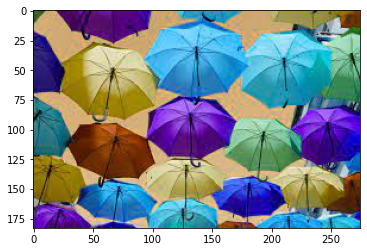

In [64]:
# loading image in working environment

img = cv2.imread(r"C:\Users\Syed Mustafa\Desktop\COLOR_Detection-main\ims.png")
imgWidth = img.shape[1] - 40
plt.imshow(img)

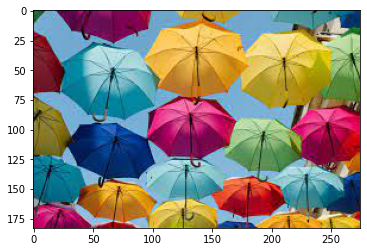

In [65]:
# original coloroured image in rgb
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [66]:
# Identifying the colors present in image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [67]:
#defining a user made function,for showing pictorial representation
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([132.37714186, 183.4504772 , 201.36774071]),
 array([188.98694952, 137.34534016,  28.07347476]),
 array([128.03795846,  14.19556035,  53.59364349]),
 array([11.60985325, 46.68443396, 91.48128931]),
 array([233.96139685, 196.98553805,  92.69838679]),
 array([109.3941863 , 127.20145342,  71.61849813]),
 array([ 28.85387849, 126.13832633, 150.94719144]),
 array([216.16496802,  52.23673297, 116.5218247 ])]

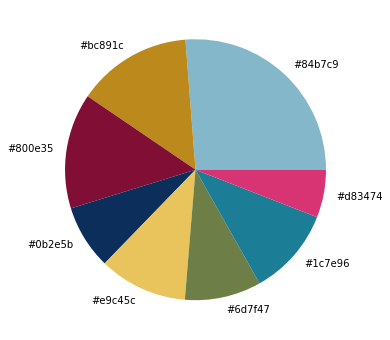

In [69]:
#checking output
get_colors(get_image(r'C:\Users\Syed Mustafa\Desktop\COLOR_Detection-main\ims.png'), 8, True)